In [62]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import nrrd

In [3]:
# I/O

# Data directory
data = os.path.abspath('./data')

## Getting list of DICOM files from folder

In [5]:
# Retrieving dcm filenames from data folder 
from typing import List
def dicom_list(data_dir: str) -> List[str]: 
    '''Locate all .dcm files in directory'''
    dicoms = []
    for dirs, subdirs, filenames in os.walk(data_dir):
        
        for filename in filenames:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                dicoms.append(os.path.join(data_dir, filename))
    
    return dicoms

In [6]:
dcms = dicom_list(data)

In [8]:
# Length of our dataset
len(dcms)

140

## Loading DICOMs as `np.ndarray`

In [34]:
def dcm_as_np(dicom_list: List[str]) -> np.ndarray:
    
    ref_dcm = pydicom.read_file(dicom_list[0])

    # Load dimensions based on the number of rows & columns
    dims = (int(ref_dcm.Rows), int(ref_dcm.Columns),len(dicom_list))
    
    dcm_array = numpy.zeros(dims, dtype=ref_dcm.pixel_array.dtype)
    
    for filename in dicom_list:
        # read the file
        ds = pydicom.read_file(filename)
        # store the raw image data
        dcm_array[:, :, dicom_list.index(filename)] = ds.pixel_array
    return dcm_array

In [35]:
dcm_array = dcm_as_np(dcms)

In [36]:
type(dcm_array)

numpy.ndarray

In [37]:
dcm_array.shape

(512, 512, 140)

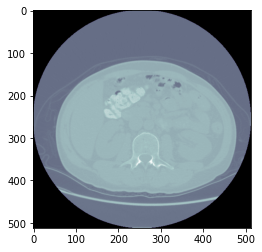

In [69]:
plt.imshow(dcm_array[:,:,3], cmap=plt.cm.bone);

## Loading `nrrd` masks

In [83]:
def nrrd_list(data_dir: str, region: str) -> List[str]:
    '''Locate referenced .nrrd files in directory'''
    nrrd_list = []
    for dirs, subdirs, filenames in os.walk(data_dir):
        
        for filename in filenames:
            if region in filename.lower():  # check whether the file's DICOM
                nrrd_list.append(os.path.join(data_dir, filename))
    
    return nrrd_list

def load_nrrd(nrrd_list: List[str]) -> np.ndarray:
    
    ref_nrrd, header = nrrd.read(nrrd_list[0])

    # Load dimensions based on the number of rows & columns
    dims = (ref_nrrd.shape[0], ref_nrrd.shape[1], len(nrrd_list))
    nrrd_array = numpy.zeros(dims)
    
    for filename in nrrd_list:
        data, header = nrrd.read(filename)
        nrrd_array[:, :, nrrd_list.index(filename)] = data.T
    
    return nrrd_array

In [88]:
region1 = load_nrrd(nrrd_list(data, 'region 1'))